In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as pl

%matplotlib widget

In [2]:
# affine of bvec-less data
DATA_PATH  = '/data/pt_02101_dMRI/007_C_C_NEGRA_ID/raw/200724_Connectom_WB/PMB200724_NEGRA_DIFF_nii/5_cbsepiseg_r52_0p5_b5k_TE72_Gap5p2_Slew13_1_of_6_e1.nii.gz'
afff = nib.load(DATA_PATH).affine
print(afff)

[[-4.98097330e-01  4.35778685e-02  1.86264426e-09  4.59166641e+01]
 [ 3.48028317e-02  3.97798240e-01 -3.00907344e-01 -5.57949867e+01]
 [ 2.62258146e-02  2.99762458e-01  3.99317592e-01 -6.18485413e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [3]:
# transform matrix from mrinfo on same file (bvec-less data)
mrinfo_trans = np.array([[ 0.9962,       0.08716,   3.725e-09,     -57.19],
                         [-0.06961,      0.7956,     -0.6018,      -48.59],
                         [-0.05245,      0.5995,      0.7986,      -56.42]])
print(mrinfo_trans)

mrinfo_stride = np.array([-1, 1, 1])
mrinfo_voxsize = np.array([0.5, 0.5, 0.5])

[[ 9.962e-01  8.716e-02  3.725e-09 -5.719e+01]
 [-6.961e-02  7.956e-01 -6.018e-01 -4.859e+01]
 [-5.245e-02  5.995e-01  7.986e-01 -5.642e+01]]


In [4]:
# seems to match with proper inclusion of strides and voxsize (i.e. rows are dimensions, not columns)
afff[:3, :3] - (np.repeat(mrinfo_stride[:, None]*mrinfo_voxsize[:, None], 3, axis=1).T)*(mrinfo_trans[:, :3])

array([[ 2.66966820e-06, -2.13150859e-06,  1.44261053e-13],
       [-2.16829062e-06, -1.75981522e-06, -7.34362602e-06],
       [ 8.14595819e-07,  1.24576092e-05,  1.75923824e-05]])

# bvec recovery from dummy data 

In [5]:
# mrinfo of bvec_recovery dicom
# /data/pt_02101_dMRI/007_C_C_NEGRA_ID/raw/200910_connectom_bvecrecovery

#   Dimensions:        70 x 1 x 70 x 67
#   Voxel size:        3 x 3 x 3 x ?
#   Data strides:      [ -1 -4 -2 3 ]
#   Format:            DICOM
#   Data type:         unsigned 16 bit integer (little endian)
#   Intensity scaling: offset = 0, multiplier = 1
#   Transform:               0.9963    -0.06279    -0.05895      -91.13
#                           0.08613      0.7263      0.6819      -113.3
#                        -2.148e-10     -0.6845       0.729      -70.86
#   EchoTime:          0.073
#   PhaseEncodingDirection: i-
#   TotalReadoutTime:  0.0345
#   comments:          Test (20.09.10-12:49:09-DST-1.3.12.2.1107.5.2.0.19951) [MR] ep2d_diff_dummy_bvecs_acq
#                      study: CE Sandbox [ ORIGINAL PRIMARY DIFFUSION NONE ND ]
#                      DOB: 01/01/1970
#                      DOS: 10/09/2020 13:00:17
#   dw_scheme:         0,0,0,0
#   [67 entries]       -0.01905577,-0.72920728000000001,0.68402742999999999,1000
#                      ...
#                      -0.85871333000000005,-0.33581792999999999,-0.3870886,1000
#                      0,0,0,0


In [6]:
# scanner bvecs file in horrible siemens format
bvec_scanner_file = '/data/pt_02101_dMRI/007_C_C_NEGRA_ID/raw/200910_connectom_bvecrecovery/DiffDirs67.txt'
f = open(bvec_scanner_file, 'r')
bvec_raw = f.readlines()
f.close()

In [7]:
bvec_scanner = []
for line in bvec_raw[2:]:
    bvec_scanner.append(line.strip().split('=')[1][2:-2].split(', '))
bvec_scanner = np.array(bvec_scanner, dtype=np.float)

In [8]:
np.linalg.norm(bvec_scanner, axis=1)

array([0.        , 0.9999864 , 1.0000703 , 1.00003197, 0.9999885 ,
       1.00010732, 1.00005672, 0.99999097, 0.99998545, 1.00008508,
       0.99999882, 0.        , 0.99991185, 1.00004013, 0.9999827 ,
       1.00012166, 1.00000487, 1.00007193, 1.0000255 , 1.00004371,
       1.00001103, 1.00009107, 0.        , 1.00004137, 1.00012664,
       0.99998634, 0.99998762, 0.99997668, 1.00011492, 1.00003508,
       1.0000284 , 0.99994774, 0.99999403, 0.        , 1.00005184,
       1.00005173, 0.99997747, 0.99999694, 1.00003988, 0.99997809,
       1.00004184, 1.00000323, 1.00009183, 1.00003894, 0.        ,
       0.99996447, 1.00010609, 0.99996261, 1.00009914, 0.99992576,
       1.00010636, 0.99999265, 1.00007895, 1.00002829, 1.00003385,
       0.        , 1.00008844, 1.00008293, 1.00000818, 1.00009077,
       0.99993429, 0.99996802, 1.00002584, 1.00003731, 1.00006771,
       1.00009454, 0.        ])

In [9]:
# bvec from bvec-recovery stride-1234 data
bvec_1234 = np.genfromtxt('/data/pt_02101_dMRI/007_C_C_NEGRA_ID/preprocessed/200724_Connectom_WB/Test_ME_dMRI/bvec_recovery/stride_1234.bvecs').T

In [10]:
np.linalg.norm(bvec_1234, axis=1)

array([0.        , 0.99999995, 0.99999998, 0.9999999 , 0.99999998,
       1.00000014, 0.99999997, 1.00000009, 0.99999998, 0.99999999,
       0.99999994, 0.        , 0.99999996, 1.00000015, 1.00000007,
       0.99999996, 0.99999992, 1.00000007, 0.9999999 , 1.00000002,
       0.99999988, 1.00000006, 0.        , 1.00000002, 1.00000003,
       1.00000003, 0.99999999, 0.99999997, 0.99999996, 1.00000008,
       1.00000001, 1.00000001, 1.        , 0.        , 0.99999989,
       1.00000003, 1.        , 1.        , 1.        , 1.        ,
       1.00000004, 1.00000004, 0.99999999, 0.99999982, 0.        ,
       1.00000008, 1.        , 1.00000003, 0.99999993, 0.99999995,
       0.99999992, 0.99999996, 1.00000004, 0.99999996, 1.00000011,
       0.        , 0.99999993, 1.00000002, 1.00000006, 1.00000007,
       0.99999997, 1.00000002, 0.99999999, 1.00000004, 0.99999989,
       0.99999992, 0.        ])

In [11]:
# affine of bvec-less data
DATA_PATH  = '/data/pt_02101_dMRI/007_C_C_NEGRA_ID/preprocessed/200724_Connectom_WB/Test_ME_dMRI/bvec_recovery/data_stride_1234.nii'
aff = nib.load(DATA_PATH).affine
print(aff)

[[ 2.98885250e+00 -1.76852778e-01 -1.88371554e-01 -9.11279907e+01]
 [ 2.58381009e-01  2.04576516e+00  2.17900991e+00 -1.13340965e+02]
 [-6.44264697e-10  2.18713689e+00 -2.05339527e+00 -7.08626556e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [12]:
bvec_scanner-bvec_1234

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.1013894 , -0.73174831,  0.31264633],
       [ 1.97220123,  0.04599148,  0.01997163],
       [-0.41317842,  0.6903541 ,  0.39205729],
       [-0.52756005, -0.36825496,  0.6694762 ],
       [ 0.24295513,  0.68156593,  0.37812925],
       [ 0.97370438, -0.54375998,  0.45661858],
       [-1.69290397, -0.07469432,  0.42671978],
       [ 0.43005098, -0.78737829,  0.07059744],
       [ 0.75335807,  0.10639676,  0.71236237],
       [ 1.41731435, -0.58655661, -0.18610908],
       [ 0.        ,  0.        ,  0.        ],
       [-1.2959294 , -0.53480292, -0.13973343],
       [ 0.76645176, -0.36183222,  0.64138725],
       [-1.6525477 ,  0.1957761 ,  0.45232402],
       [ 1.10242599, -0.12874458,  0.63965795],
       [-1.51305008, -0.33689674,  0.36348635],
       [-0.16316194,  0.53806172,  0.59026768],
       [-0.26580158, -0.58164962,  0.52364222],
       [ 1.89995135, -0.1146261 ,  0.21222464],
       [-0.27383698, -0.77273645,  0.076

In [13]:
def angle_between(v1, v2):
    # assumes norm=1
    # in radians
    return np.arccos(np.clip(np.dot(v1, v2), -1.0, 1.0))

def rad2deg(rad):
    return (180/np.pi)*rad

In [14]:
scaled_aff = aff[:3,:3]/3
invaff = np.linalg.inv(scaled_aff)

In [16]:
transform = np.eye(3)
# transform = scaled_aff
# transform = scaled_aff.T
# transform = invaff
# transform = invaff.T

dist_deg = []
for i in range(bvec_scanner.shape[0]):
    dist_deg.append(rad2deg(angle_between(bvec_1234[i,:], (transform.dot(bvec_scanner[i,:])))))
print(dist_deg)

[90.0, 47.293363446829034, 161.0805934385915, 53.164127151694316, 55.3247988800458, 48.17659389151682, 74.10240410840845, 121.78985991002146, 53.48457135734264, 62.81141824914293, 101.17076824246855, 90.0, 89.57454617702061, 64.20413943915317, 119.13944565234877, 79.65462415142063, 105.5135556259937, 48.10266624257237, 48.81888439270967, 146.50698050782808, 48.6224063645092, 59.928282261386265, 90.0, 83.69143911997354, 72.05312191256539, 131.89412616030316, 55.72659209933174, 99.75613053863799, 97.31501022718278, 51.717144515545435, 81.32166021040086, 70.71780941999852, 122.07407739610656, 90.0, 47.9860335844829, 157.82797936893917, 57.50363223813563, 95.35519316856848, 66.92187018847774, 69.89573676140735, 93.44306499471907, 87.58847999443255, 125.21624911970659, 52.29691487727217, 90.0, 81.77862563633852, 49.14725977690871, 137.54992456218673, 46.87176905267145, 107.14920510496098, 53.61840894353593, 65.47436588051264, 125.16124639690831, 65.03753283179108, 93.04556805370724, 90.0, 6

In [17]:
from dipy.viz import window, actor
ren = window.Scene()
ren.SetBackground(1, 1, 1)
# ren.add(actor.point(bvec_scanner, window.colors.green, point_radius=0.05))
# ren.add(actor.point(bvec_1234   , window.colors.red,   point_radius=0.05))
ren.add(actor.point(bvec_scanner.dot(scaled_aff), window.colors.blue,   point_radius=0.05))
# ren.add(actor.point(bvec_scanner.dot(scaled_aff.T), window.colors.blue,   point_radius=0.05))
ren.add(actor.point(bvec_scanner.dot(invaff), window.colors.red,   point_radius=0.05))
# ren.add(actor.point(bvec_scanner.dot(invaff.T), window.colors.blue,   point_radius=0.05))
window.show(ren)

ImportError: No module named 'vtk.util'

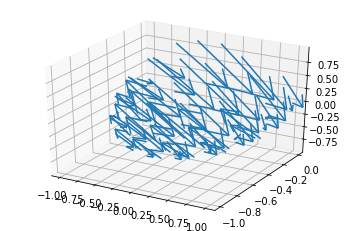

In [17]:
from mpl_toolkits.mplot3d import Axes3D 


fig = pl.figure()
ax = fig.gca(projection='3d')

bvec0 = bvec_scanner
bvec1 = bvec_scanner.dot(scaled_aff)


x = bvec0[:, 0]
y = bvec0[:, 1]
z = bvec0[:, 2]

u = bvec1[:, 0] - bvec0[:, 0]
v = bvec1[:, 1] - bvec0[:, 1]
w = bvec1[:, 2] - bvec0[:, 2]


ax.quiver(x, y, z, u, v, w)
pl.show()

In [21]:
transforms = [np.eye(3), scaled_aff, scaled_aff.T, invaff, invaff.T]
flips = [np.array([1,1,1]), np.array([-1,-1,-1]), np.array([-1,-1,1]), np.array([-1,1,-1]), np.array([1,-1,-1]), np.array([1,1,-1]), np.array([1,-1,1]), np.array([-1,1,1])]

for i_t in range(len(transforms)):
    for i_f in range(len(flips)):
        dist_deg = []
        for i in range(bvec_scanner.shape[0]):
            dist_deg.append(rad2deg(angle_between(bvec_1234[i,:], (flips[i_f]*transforms[i_t].dot(bvec_scanner[i,:])))))
        print(np.array(dist_deg).sum())

5614.465746719068
6445.534253280932
4565.202525537836
4578.941664153441
9227.861326917653
7494.797474462164
7481.05833584656
2832.138673082346
7483.971384261622
4576.028615738379
4603.711707027462
4902.412820245906
7497.795034134662
7456.288292972538
7157.587179754095
4562.204965865339
7498.288372335544
4561.711627664456
4613.92612068661
4921.281464464546
7420.0049012274985
7446.07387931339
7138.718535535455
4639.995098772503
7498.288400180659
4561.711599819342
4613.926123581512
4921.281469872166
7420.004867137106
7446.073876418488
7138.718530127834
4639.995132862895
7483.971280506069
4576.028719493932
4603.711710350587
4902.412824306932
7497.795143523694
7456.288289649413
7157.587175693068
4562.204856476306


In [23]:
def func(x):
    # current estimated transform matrix
    trans = x.reshape((3,3))
    # estimated bvec from transforming bvec-scanner
    est_bvec = bvec_scanner.dot(trans)
    # difference with mrconvert bvec -stride 1234
    diff = bvec_1234 - est_bvec
    # return l2 error
    return np.linalg.norm(diff)

In [30]:
from scipy.optimize import fmin

x0 = np.array([1,0,0,0,1,0,0,0,1])
results = fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None)

In [31]:
results

array([-0.99610494, -0.00870559,  0.18096165,  0.05773608,  0.68101489,
        0.71618533, -0.00744693, -0.7113459 ,  0.68407106])

In [33]:
func(results)

0.6301712939823163

In [34]:
trans = results.reshape((3,3))
est_bvec = bvec_scanner.dot(trans)
diff = bvec_1234 - est_bvec

In [45]:
idx_non_zero = np.linalg.norm(bvec_scanner, axis=1)>0.1
est_bvec_n0 = est_bvec[idx_non_zero]
bvec_scanner_n0 = bvec_scanner[idx_non_zero]
bvec_1234_n0 = bvec_1234[idx_non_zero]

est_bvec_norm = est_bvec_n0 / np.linalg.norm(est_bvec_n0, axis=1)[:,None]

In [46]:
est_bvec_n0

array([[-0.0565311 , -0.01020609, -0.9866001 ],
       [-0.98583974, -0.15145363,  0.25934851],
       [ 0.19744822, -0.75702523,  0.55649575],
       [ 0.25010669, -0.55823941, -0.81175755],
       [-0.129822  , -0.77254661,  0.62492974],
       [-0.49574144, -0.31227702, -0.74529182],
       [ 0.83738632, -0.35764785, -0.48084475],
       [-0.21575095,  0.27519468, -0.89502334],
       [-0.3914012 , -0.90458644, -0.14641468],
       [-0.70378325,  0.41839906, -0.42894618],
       [ 0.65142866,  0.4893121 , -0.68865396],
       [-0.39623212, -0.59934273, -0.64926797],
       [ 0.81618158, -0.51930867, -0.1778062 ],
       [-0.56395802, -0.72799622, -0.34313899],
       [ 0.74922525, -0.16956136, -0.73275677],
       [ 0.06859229, -0.92267525,  0.31061817],
       [ 0.12250888, -0.3035756 , -0.95764059],
       [-0.95373299, -0.28948956, -0.02961114],
       [ 0.13627392,  0.30006663, -0.95892175],
       [ 0.30501844, -0.87903978, -0.32859165],
       [-0.5702345 ,  0.22766799, -0.690

In [48]:
dist_deg = []
for i in range(est_bvec_norm.shape[0]):
    dist_deg.append(rad2deg(angle_between(bvec_1234_n0[i,:], (est_bvec_norm[i,:]))))
print(dist_deg)

[1.5932233546588186, 7.385580976204794, 0.2182835946701278, 2.2074691940745885, 1.0416315625606958, 3.312722667531101, 6.234558962135192, 1.221348141237812, 3.126734119512268, 4.304878198374852, 2.604168969486434, 3.119774559687946, 6.5618021642237405, 4.495986215800002, 4.407560075952531, 0.3736093275309443, 1.5977410720567042, 7.51074975929857, 1.1253222600511947, 2.8208982944503824, 2.5877577439434516, 3.4471019850737616, 6.799882615919353, 1.0492203273702216, 5.030907923094099, 4.416344613455192, 2.000444780708723, 4.314449069019367, 0.5810342919486502, 5.986903749588195, 1.6900706954783822, 7.758537078838908, 0.9157567685147843, 5.234116958802542, 2.461473228209551, 2.4091795192783567, 5.148641067994007, 4.258874608511764, 6.6402266410270325, 1.531750867849283, 2.021190156185829, 1.4469274732119106, 6.131710097342235, 1.1811546037968501, 3.6704707919604207, 2.2993511455367215, 0.8707114326345948, 5.438815613472345, 2.0313004685687077, 5.2456357144728845, 2.2883031211838674, 1.7326

In [56]:
ren = window.Scene()
ren.SetBackground(1, 1, 1)
# ren.add(actor.point(bvec_scanner, window.colors.green, point_radius=0.05))
ren.add(actor.point(bvec_1234   , window.colors.red,   point_radius=0.05))
# ren.add(actor.point(bvec_scanner.dot(scaled_aff), window.colors.blue,   point_radius=0.05))
# ren.add(actor.point(bvec_scanner.dot(scaled_aff.T), window.colors.blue,   point_radius=0.05))
ren.add(actor.point(est_bvec_norm, window.colors.blue,   point_radius=0.05))
# ren.add(actor.point(bvec_scanner.dot(invaff.T), window.colors.blue,   point_radius=0.05))
window.show(ren)

In [38]:
np.linalg.norm(est_bvec, axis=1)

array([0.        , 0.98827106, 1.03057258, 0.9600836 , 1.01643244,
       1.00210737, 0.9480171 , 1.02972787, 0.96090965, 0.99644809,
       0.92431783, 0.        , 1.06678484, 0.96838035, 0.9835898 ,
       0.98273675, 1.06161293, 0.97597037, 1.01204845, 0.99713973,
       1.01397312, 0.98677235, 0.        , 0.92384796, 1.02124142,
       0.95412625, 1.03483181, 0.94689697, 1.04888214, 0.97420794,
       0.97068279, 1.0585337 , 0.93305294, 0.        , 0.99418076,
       0.97503985, 1.03430748, 0.95781717, 0.95362634, 1.04504905,
       1.01362222, 1.03694864, 0.95444776, 0.97475336, 0.        ,
       1.06559742, 0.993137  , 1.05437673, 0.98692885, 1.07494031,
       0.98369551, 0.93802493, 1.06207742, 0.94523272, 1.00319953,
       0.        , 1.04113183, 0.98860745, 0.93423346, 0.9893242 ,
       0.98337263, 1.00695317, 1.00869947, 0.93038615, 1.00963473,
       1.03183839, 0.        ])

In [35]:
print(diff)

[[ 0.          0.          0.        ]
 [-0.0252583   0.0127544  -0.01004623]
 [-0.00026148  0.06426215 -0.11792014]
 [ 0.0045302  -0.03182887  0.02394696]
 [-0.02754664 -0.01870564  0.02588135]
 [ 0.00396686 -0.00981933 -0.01495898]
 [-0.02516293  0.036437   -0.06252676]
 [-0.01398234 -0.05975784  0.09642497]
 [-0.01940003  0.0278836  -0.02847411]
 [-0.01835687  0.01368968 -0.04954769]
 [-0.0080311   0.05995755 -0.08534474]
 [ 0.          0.          0.        ]
 [-0.00829926 -0.03140918  0.07488739]
 [-0.02631964  0.02397495 -0.05101928]
 [-0.00823388 -0.06406743  0.09478218]
 [-0.02186797  0.03084079 -0.07011896]
 [-0.01837517 -0.0484419   0.08597043]
 [-0.00473035 -0.02348648  0.00671415]
 [-0.02810729 -0.00457478  0.01099837]
 [-0.00911837  0.06151566 -0.1151135 ]
 [-0.01993694  0.00356982  0.01326305]
 [-0.01952483 -0.03273745  0.03337008]
 [ 0.          0.          0.        ]
 [-0.01681774  0.04956256 -0.07031424]
 [-0.00974062  0.01833535 -0.06095561]
 [ 0.00203383 -0.0686052 

In [19]:
from scipy.spatial.transform import Rotation as R

def func(x):
    # current estimated transform matrix
    trans = R.from_rotvec((x[0]) * x[1:]/np.linalg.norm(x[1:])).as_matrix()
    # estimated bvec from transforming bvec-scanner
    est_bvec = trans.dot(bvec_scanner.T).T
    # difference with mrconvert bvec -stride 1234
    diff = bvec_1234 - est_bvec
    # return l2 error
    return np.linalg.norm(diff)

In [20]:
x0 = np.array([0, 1, 1, 1])
results = fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None)

NameError: name 'fmin' is not defined

In [21]:
trans = R.from_rotvec((results[0]) * results[1:]/np.linalg.norm(results[1:])).as_matrix()

NameError: name 'results' is not defined

In [ ]:
est_bvec = trans.dot(bvec_scanner.T).T

In [ ]:
np.linalg.norm(est_bvec, axis=1)

In [ ]:
dist_deg = []
for i in range(est_bvec.shape[0]):
    dist_deg.append(rad2deg(angle_between(bvec_1234[i,:], (est_bvec[i,:]))))
print(dist_deg)

In [ ]:
from dipy.viz import window, actor
ren = window.Scene()
ren.SetBackground(1, 1, 1)
ren.add(actor.point(bvec_1234, window.colors.green, point_radius=0.05))
ren.add(actor.point(est_bvec   , window.colors.red,   point_radius=0.05))
window.show(ren)